In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('online_shoppers_intention.csv')

In [4]:
data1 = pd.get_dummies(df)
data1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Revenue'] = le.fit_transform(df['Revenue'])
df['Revenue'].value_counts()
# getting dependent and independent variables
x=data1
# removing the target column revenue from 
x = x.drop(['Revenue'], axis = 1)
y = data1['Revenue']
# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 28)
Shape of y: (12330,)


In [8]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
# checking the shape
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)


In [9]:
# MODELLING
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.99976827714054
Testing Accuracy : 0.8932143822654771


              precision    recall  f1-score   support

       False       0.91      0.96      0.94      3077
        True       0.75      0.55      0.63       622

    accuracy                           0.89      3699
   macro avg       0.83      0.76      0.79      3699
weighted avg       0.89      0.89      0.89      3699



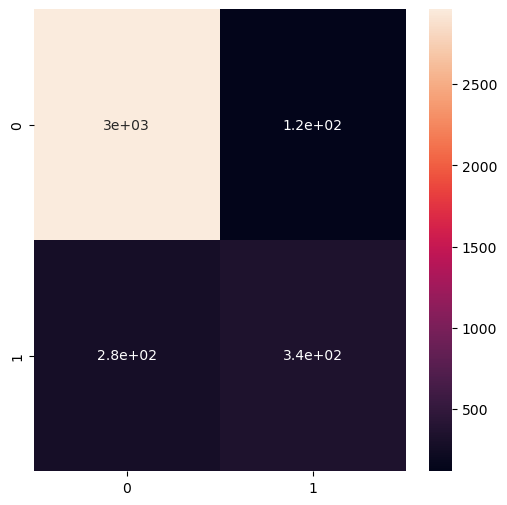

In [10]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)
# classification report
cr = classification_report(y_test, y_pred)
print(cr)

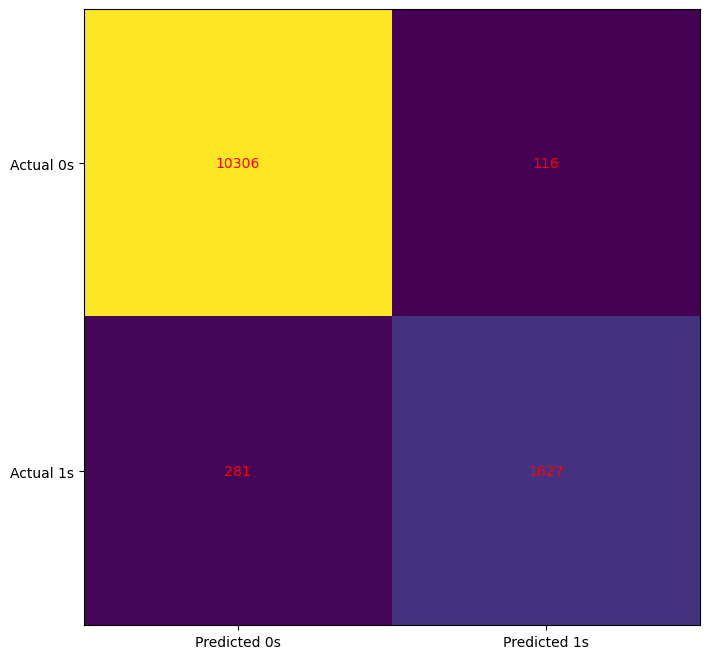

In [13]:
cm = confusion_matrix(y, model.predict(x))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

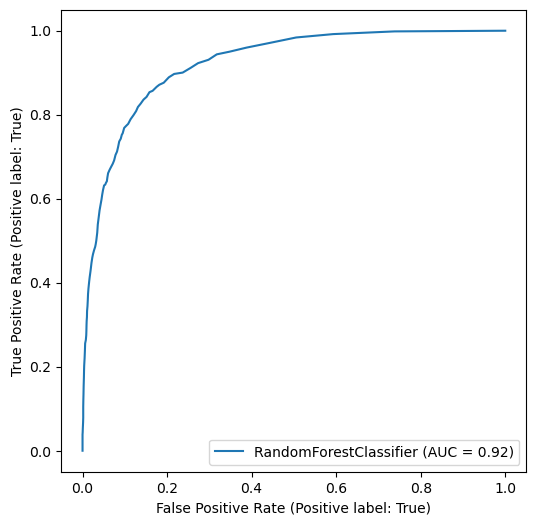

In [16]:
from sklearn.metrics import RocCurveDisplay
rf_disp = RocCurveDisplay.from_estimator(model, x_test, y_test)
plt.show()

In [18]:
df=pd.DataFrame(y_pred,columns=["Revenue"])

## Building Logistic Regression model

In [20]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(solver='liblinear', random_state=0)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[2961  116]
 [ 279  343]]


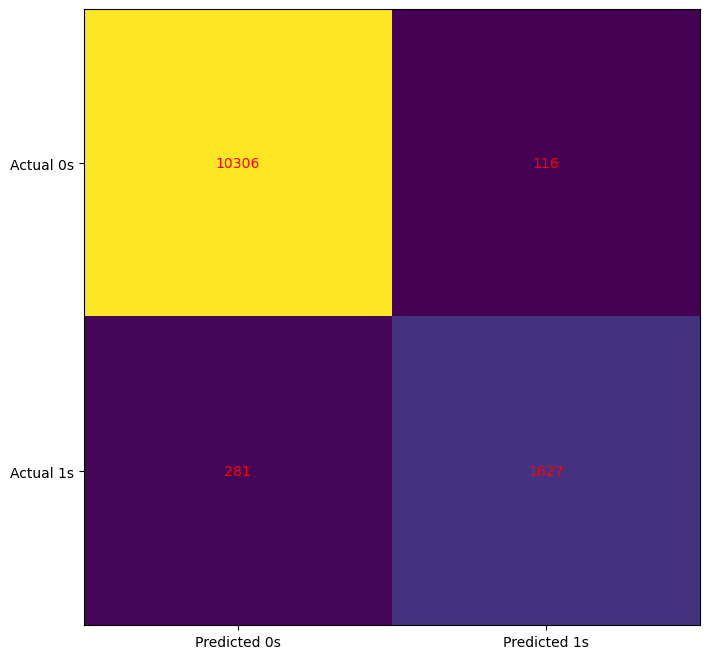

In [23]:
cm = confusion_matrix(y, model.predict(x))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [24]:
# classification report
cr1 = classification_report(y_test, y_pred1)
print(cr1)

              precision    recall  f1-score   support

       False       0.89      0.98      0.93      3077
        True       0.76      0.38      0.51       622

    accuracy                           0.88      3699
   macro avg       0.82      0.68      0.72      3699
weighted avg       0.87      0.88      0.86      3699



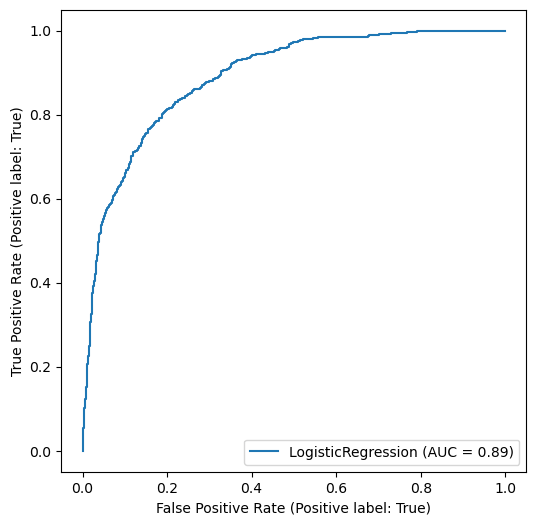

In [27]:
from sklearn.metrics import RocCurveDisplay
lr_disp = RocCurveDisplay.from_estimator(model1, x_test, y_test)
plt.show()

In [28]:
df1 = pd.DataFrame(y_pred1, columns=["Revenue"])

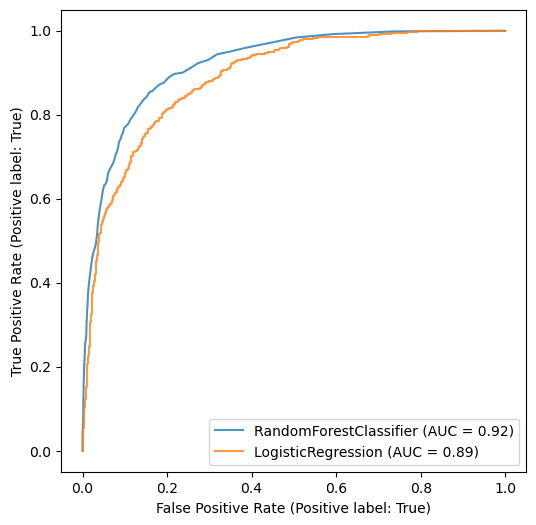

In [31]:
ax = plt.gca()
rf_disp = RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax, alpha=0.8)
lr_disp.plot(ax=ax, alpha=0.8)
plt.show()